In [1]:
%load_ext autoreload
%autoreload 2

import scanpy
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import utils
from matplotlib import pyplot as plt

In [2]:
sce_4eq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix4eq.h5ad')
data_4eq, cs_4eq, labels_4eq = utils.parse_h5ad(sce_4eq, 'phenoid')
data_4eq = np.log1p(data_4eq)

In [34]:
C_4eq, avg_inter_4eq, avg_intra_4eq = utils.get_compressibility(data_4eq, cs_4eq, 4, True)
avg_inter_4eq, avg_intra_4eq

/Users/nikhildeorkar/code/school/CURVE/utils.py:124: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([2.01962796, 1.69403059, 2.25244834, 2.32134343]),
 array([5.35545662, 5.2877047 , 6.77998599, 5.27328048]))

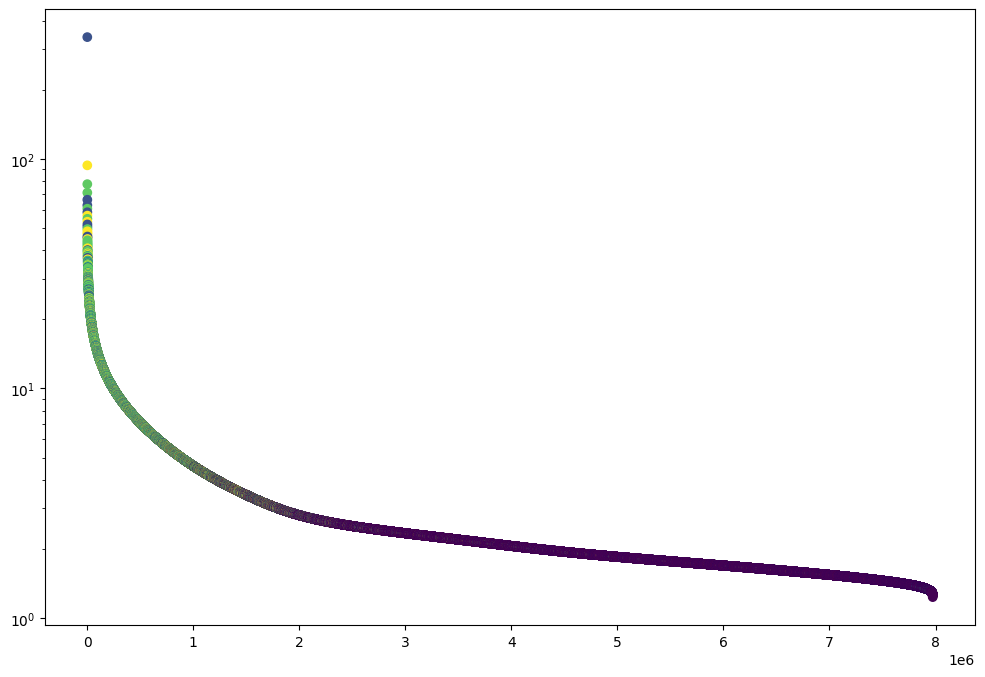

In [35]:
cgraph_4eq = utils.compression_grouping(C_4eq, cs_4eq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_4eq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_4eq[index, 0], c=cgraph_4eq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

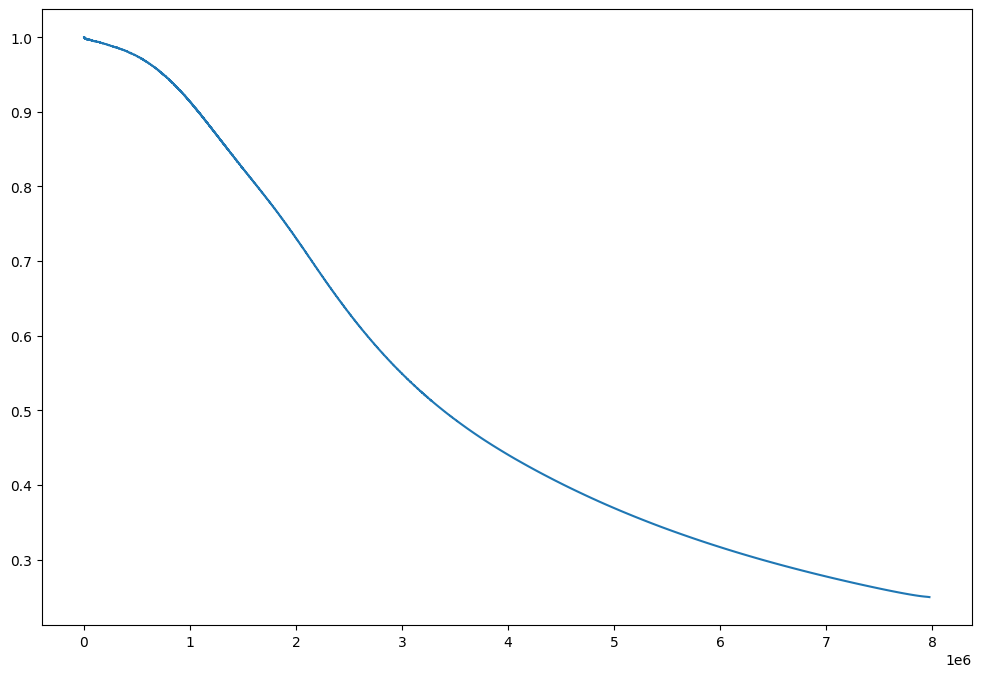

In [36]:
curr = 0
prop = []
for i in range(len(cgraph_4eq)): 
    if cgraph_4eq[i, 1] != 0: 
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [37]:
sce_4uneq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix4uneq.h5ad')
data_4uneq, cs_4uneq, labels_4uneq = utils.parse_h5ad(sce_4uneq, "phenoid")
data_4uneq = np.log1p(data_4uneq)

In [39]:
C_4uneq, avg_inter_4uneq, avg_intra_4uneq = utils.get_compressibility(data_4uneq, cs_4uneq, 4, True)
avg_inter_4uneq, avg_intra_4uneq

/Users/nikhildeorkar/code/school/CURVE/utils.py:124: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([1.93046897, 1.70815702, 2.40844891, 2.02957598]),
 array([5.05596903, 5.28627308, 6.44798877, 4.78318257]))

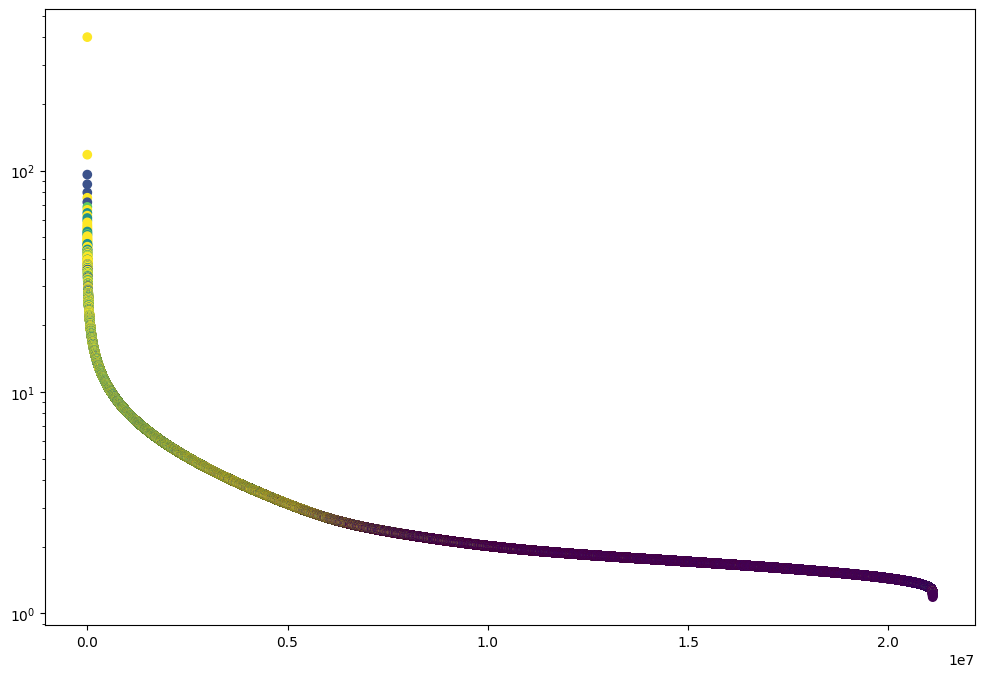

In [40]:
cgraph_4uneq = utils.compression_grouping(C_4uneq, cs_4uneq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_4uneq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_4uneq[index, 0], c=cgraph_4uneq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

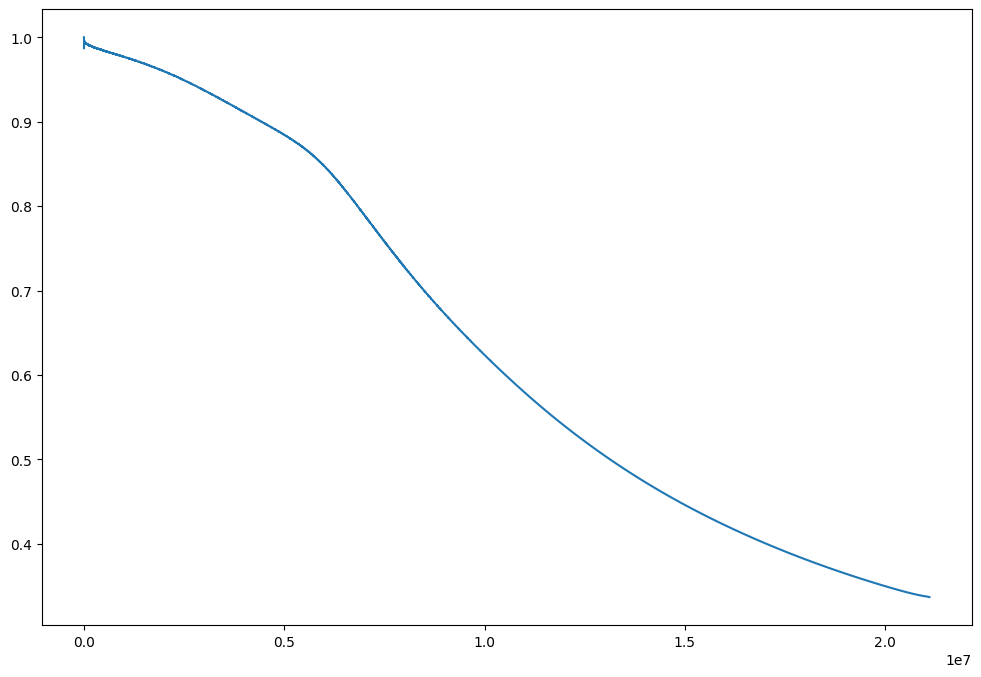

In [41]:
curr = 0
prop = []

for i in range(len(cgraph_4uneq)):
    if cgraph_4uneq[i, 1] != 0:
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [42]:
sce_8eq = scanpy.read_h5ad('data/zheng/sce_full_Zhengmix8eq.h5ad')
data_8eq, cs_8eq, labels_8eq = utils.parse_h5ad(sce_8eq, "phenoid")
data_8eq = np.log1p(data_8eq)

In [43]:
C_8eq, avg_inter_8eq, avg_intra_8eq = utils.get_compressibility(data_8eq, cs_8eq, 8, True)
avg_inter_8eq, avg_intra_8eq

/Users/nikhildeorkar/code/school/CURVE/utils.py:124: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([1.9602753 , 2.78784059, 1.64419198, 1.92259829, 2.50611135,
        2.53013048, 2.66867767, 2.61453216]),
 array([3.96498621, 4.22773301, 4.13537919, 4.72548665, 3.99599664,
        5.15229871, 4.61952147, 3.92481959]))

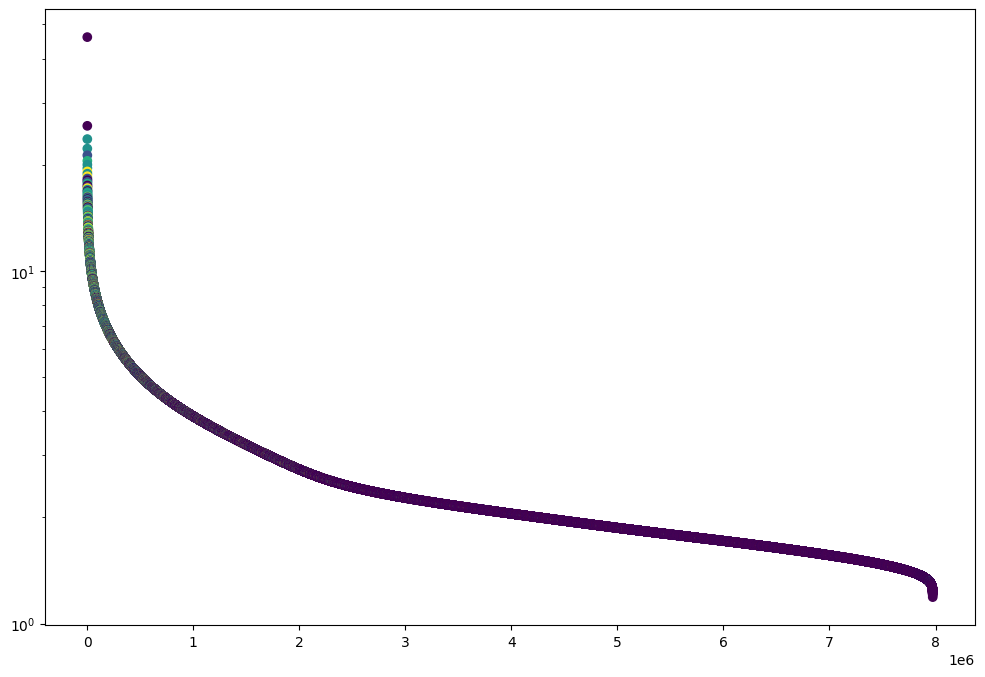

In [44]:
cgraph_8eq = utils.compression_grouping(C_8eq, cs_8eq)[::-1]
step_size = 100
index = list(range(0, len(cgraph_8eq), step_size))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.scatter(index, cgraph_8eq[index, 0], c=cgraph_8eq[index, 1])
# Set vertical scale to be logarithmic
plt.yscale('log')
plt.show()

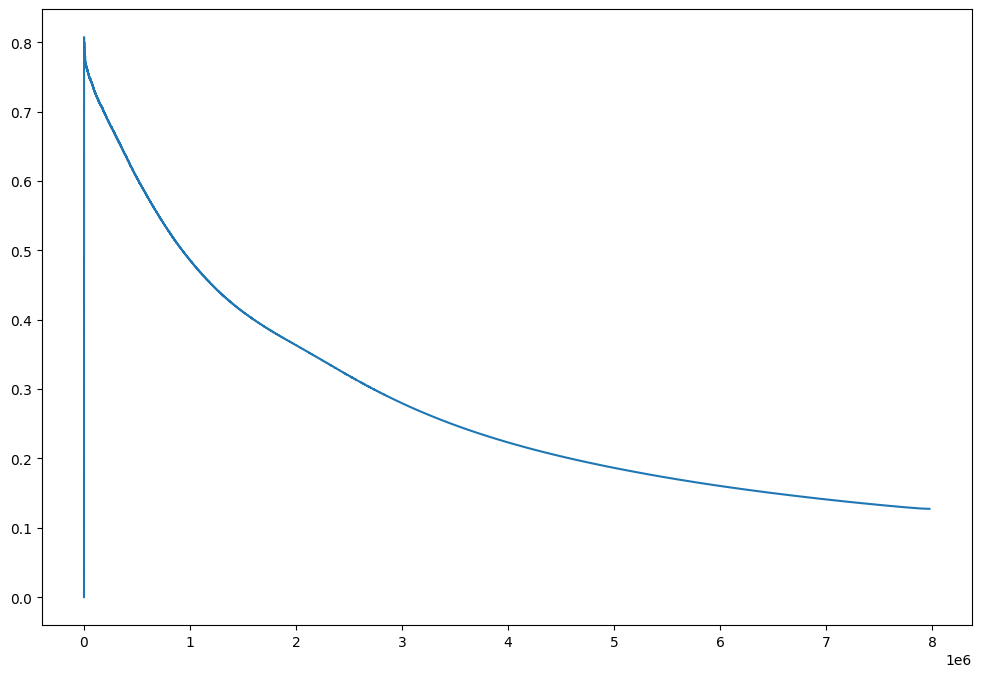

In [45]:
curr = 0
prop = []

for i in range(len(cgraph_8eq)):
    if cgraph_8eq[i, 1] != 0:
        curr += 1
    prop.append(curr / (i + 1))

plt.figure(figsize=(12,8))
# Plot values from test colored if inter or intra cluster, x axis is index
plt.plot(range(len(prop)), prop)
plt.show()

In [3]:
"""
Outlier testing - 4eq
"""

data_4eq_outliers = data_4eq.copy()
cs_4eq_outliers = cs_4eq.copy()

o = 10 
cs_4eq_outliers.append(o)

In [4]:
for i in range(o): 
    clusters = np.random.choice(range(len(cs_4eq_outliers) - 1), size=2, replace=False)
    weight = np.random.uniform(0.5, 0.7)
    sample = [
        data_4eq_outliers[np.random.randint(sum(cs_4eq_outliers[:clusters[0]]), sum(cs_4eq_outliers[:clusters[0]+1]))],
        data_4eq_outliers[np.random.randint(sum(cs_4eq_outliers[:clusters[1]]), sum(cs_4eq_outliers[:clusters[1]+1]))]
    ]
    point = (sample[0] * weight) + (sample[1] * (1 - weight))
    data_4eq_outliers = np.vstack((data_4eq_outliers, point))

In [5]:
"""
Compare norms of outliers with sample of cluster points
Weighted average of two random points in different clusters
"""
l2 = []
for i in range(len(cs_4eq_outliers) - 1): 
    point_idx = np.random.randint(sum(cs_4eq_outliers[:i]), sum(cs_4eq_outliers[:i+1]))
    l2.append(np.linalg.norm(data_4eq_outliers[point_idx]))

print("Non-outliers:")
print(l2)

l2_outliers = []
for i in range(o): 
    idx = -1 * (i + 1)
    dist = round(np.linalg.norm(data_4eq_outliers[idx]), 3)
    l2_outliers.append(dist)

print("Outliers:")
print(l2_outliers)

Non-outliers:
[26.416344505217058, 19.702057084249272, 27.790870472889768, 27.855145563391964]
Outliers:
[33.577, 28.122, 25.996, 19.088, 23.128, 22.367, 19.967, 27.364, 24.279, 20.153]


In [6]:
C_4eq_outliers, avg_inter_4eq_outliers, avg_intra_4eq_outliers = utils.get_compressibility(data_4eq_outliers, cs_4eq_outliers, 4, True)
avg_inter_4eq_outliers, avg_intra_4eq_outliers

/Users/nikhildeorkar/code/school/CURVE/utils.py:124: RuntimeWarning: invalid value encountered in divide
  C = D_pre / D


(array([2.02210627, 1.69443788, 2.25368275, 2.32240576, 2.47308905]),
 array([5.35774297, 5.28627271, 6.77768213, 5.27323934, 2.8554198 ]))

In [15]:
"""
Median variance of compressibility for outliers 
"""
outlier_var = [np.var(C_4eq_outliers[i]) for i in range(sum(cs_4eq_outliers) - o, sum(cs_4eq_outliers))]
np.median(outlier_var)

0.9477451174236884

In [16]:
"""
Median variance of compressibility for non-outliers
"""
non_outlier_var = [np.var(C_4eq_outliers[i]) for i in range(sum(cs_4eq_outliers) - o)]
np.median(non_outlier_var)

7.176552492375892